In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
d = pd.read_csv('./data/titulky_test.csv')

In [13]:
ht = {'parlamentnilisty.cz': 1, 'zpravy.rozhlas.cz': 0}
d['hate'] = d.feed_id.apply(lambda x: ht[x])

In [14]:
d.columns

Index(['created_time', 'feed_id', 'id', 'message', 'hate'], dtype='object')

In [18]:
split = 0.7
d_train = d[:int(split*len(d))]
d_test = d[int((1-split)*len(d)):]

In [24]:
vectorizer = CountVectorizer()

In [29]:
features = vectorizer.fit_transform(d_train.message)
test_features = vectorizer.transform(d_test.message)
i = 1000
j = 10
words = vectorizer.get_feature_names()[i:i+10]
pd.DataFrame(features[j:j+7,i:i+10].todense(), columns=words)

celkove  celkového  celkovém  celkově  celodenní  celorepublikové  \
0        0          0         0        0          0                0   
1        0          0         0        0          0                0   
2        0          0         0        0          0                0   
3        0          0         0        0          0                0   
4        0          0         0        0          0                0   
5        0          0         0        0          0                0   
6        0          0         0        0          0                0   

   celospolečenské  celostátním  celosvětový  celosvětově  
0                0            0            0            0  
1                0            0            0            0  
2                0            0            0            0  
3                0            0            0            0  
4                0            0            0            0  
5                0            0            0            0  
6                0            0            0            0

In [32]:
model1 = MultinomialNB()
model1.fit(features, d_train.hate)
pred1 = model1.predict_proba(test_features)

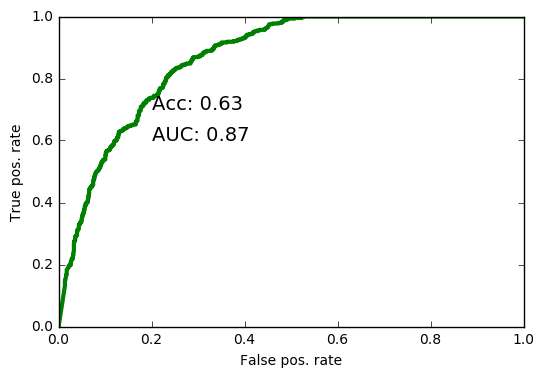

In [47]:
def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plt.plot(fpr, tpr, color, linewidth="3")
    plt.xlabel("False pos. rate")
    plt.ylabel("True pos. rate")
    if ann:
        plt.annotate("Acc: %0.2f" % acc, (0.2,0.7), size=14)
        plt.annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

performance(d_test.hate, pred1)

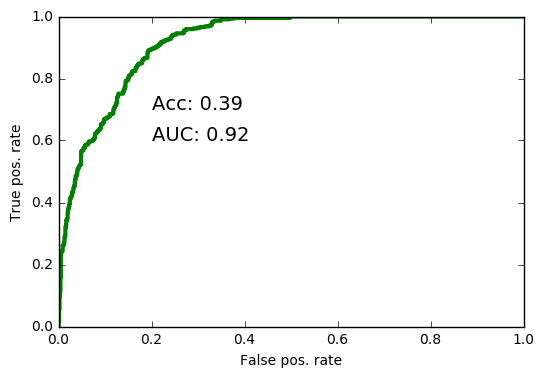

In [50]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(d_train.message)
model2 = MultinomialNB()
model2.fit(features, d_train.hate)
pred2 = model2.predict_proba(vectorizer.transform(d_test.message))
performance(d_test.hate, pred2)